In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston, load_iris
from sklearn.metrics import mean_squared_error, classification_report

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential

### 1. Regression

In [3]:
data = load_boston()

In [4]:
X, y = data['data'], data['target']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.15)

In [6]:
X_train.shape

(430, 13)

In [7]:
14 * 32

448

In [8]:
model = Sequential([
    Input(shape=(X_train.shape[1], )),
    Dense(32, activation='sigmoid'),
    Dense(16, activation='sigmoid'),
    Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 993
Trainable params: 993
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=1000, verbose=0)

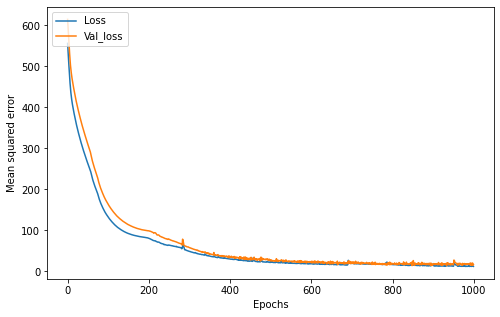

In [10]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.legend(loc='upper left')
plt.ylabel('Mean squared error')
plt.xlabel('Epochs');

In [11]:
y_predicted = [i[0] for i in model.predict(X_test)]
df = pd.DataFrame({'actual': y_test, 'predicted': y_predicted}) 
df

,actual,predicted
0,17.4,20.325144
1,18.4,18.036749
2,12.7,17.344290
3,10.4,12.158787
4,15.0,18.775051
...,...,...
71,20.8,15.755115
72,9.7,12.549266
73,8.7,10.814241
74,37.6,46.112629


In [12]:
mean_squared_error(y_predicted, y_test)

23.87669336111151

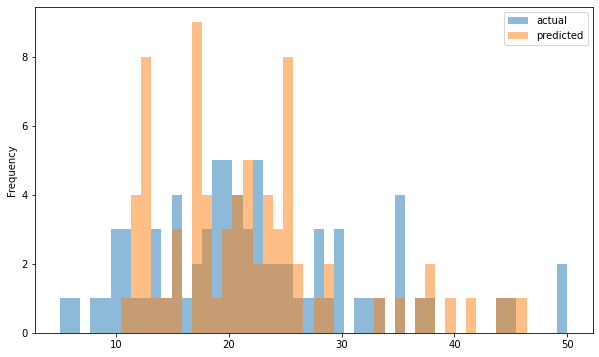

In [13]:
df.plot(kind='hist', bins=50, alpha=0.5, figsize=(10, 6));

In [14]:
model.weights[0]

<tf.Variable 'dense/kernel:0' shape=(13, 32) dtype=float32, numpy=
array([[-3.81303906e-01, -3.45525444e-01,  2.77883291e-01,
        -2.71775305e-01,  1.62165895e-01, -4.17892069e-01,
         2.33979560e-02, -7.39346743e-02, -1.79365829e-01,
        -3.25341552e-01, -3.61953676e-01,  3.16508144e-01,
        -2.36826479e-01, -3.70290399e-01, -4.92440373e-01,
         1.95824504e-01,  1.98444366e-01,  4.91687655e-03,
         4.14751798e-01, -6.66254997e-01, -1.75832406e-01,
        -6.40090346e-01,  3.52984309e-01, -2.18408972e-01,
         2.51026154e-02,  1.20091140e-01,  1.75231323e-01,
        -3.53161663e-01, -3.21596473e-01, -3.36872935e-01,
        -7.17192054e-01,  1.26646280e-01],
       [-2.72464812e-01,  1.41506493e-01,  2.74198167e-02,
        -1.36911914e-01,  3.26891899e-01, -1.55721297e-02,
         1.11187384e-01,  6.30126894e-02,  5.75967133e-02,
         3.08247060e-01, -3.56227569e-02, -1.40172876e-02,
        -1.94813520e-01, -2.69382149e-01,  3.91506450e-03,
     

In [15]:
model.weights[1]

<tf.Variable 'dense/bias:0' shape=(32,) dtype=float32, numpy=
array([ 1.13914184e-01,  0.00000000e+00,  1.99176982e-01, -3.32775302e-02,
        1.15659304e-01,  2.91574687e-01,  1.04187801e-01,  0.00000000e+00,
        0.00000000e+00,  2.49358609e-01, -1.05203530e-02,  4.83235903e-02,
        0.00000000e+00,  5.30097224e-02,  8.65683705e-02, -1.47392021e-17,
        0.00000000e+00,  0.00000000e+00,  9.47492104e-03,  1.36902019e-01,
        0.00000000e+00,  1.55081183e-01,  4.77051064e-02,  0.00000000e+00,
        2.33170942e-28,  0.00000000e+00,  3.90849151e-02,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  6.68970570e-02, -1.07212242e-24],
      dtype=float32)>

In [16]:
model.weights[2]

<tf.Variable 'dense_1/kernel:0' shape=(32, 16) dtype=float32, numpy=
array([[-0.40256014, -0.21222383,  0.00316343, -0.65128636,  0.29282656,
         0.45861304,  0.264941  , -0.1905199 ,  0.2988348 , -0.07588252,
         0.34948367,  0.19830087, -0.50482935, -0.37018353,  1.1652642 ,
        -0.18880591],
       [ 0.01309461, -0.04194472, -0.28660864,  0.07692453, -0.5774404 ,
        -0.48486975, -0.1500303 , -0.31901208,  0.6204978 , -0.2022106 ,
        -0.07180616, -0.2646256 , -0.56503683, -0.41259548,  0.09264533,
         0.09450278],
       [-1.6713747 , -0.0474883 , -0.24575387, -0.19451743,  2.44146   ,
         2.53931   ,  2.1742508 ,  0.33192778,  0.06798993,  2.618649  ,
         1.8503225 ,  1.0147148 , -0.4896144 , -0.29252735, -0.61159855,
         1.9123856 ],
       [-0.03012511, -0.26814675,  0.04851545,  0.22609892, -0.13510992,
         0.13939066,  0.16248527,  0.26533353,  0.31772766,  0.05722508,
        -0.256741  , -0.08154496,  0.15855129, -0.35160577, -0

In [17]:
model.weights[3]

<tf.Variable 'dense_1/bias:0' shape=(16,) dtype=float32, numpy=
array([ 0.3156785 , -0.19826332, -0.26321998, -0.2717388 , -0.37237975,
       -0.35631207, -0.20141844, -0.04802746,  0.44300392, -0.3143146 ,
       -0.29953092, -0.11748472, -0.23822726, -0.19947593, -0.01607064,
       -0.22690387], dtype=float32)>

In [18]:
from tensorflow.keras.models import save_model, load_model

In [19]:
save_model(model, 'boston_model.h5')

### Deploy

In [20]:
A = X_train[1:3, :]
A

array([[3.83518e+01, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.93000e-01,
        5.45300e+00, 1.00000e+02, 1.48960e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.96900e+02, 3.05900e+01],
       [6.37960e-01, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.09600e+00, 8.45000e+01, 4.46190e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.80020e+02, 1.02600e+01]])

In [21]:
housing_model = load_model('boston_model.h5')

def housing_price_prediction(X):
  
    return housing_model.predict(X)

In [31]:
%timeit housing_price_prediction(X_train[10:100, :])

36.6 ms ± 586 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


### 2. Classification 

In [43]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

In [36]:
churn_df = pd.read_csv('Churn_Modelling.csv', index_col='RowNumber')
churn_df.head(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [38]:
columns = churn_df.columns[2: ]
trainable_df = churn_df[columns]
trainable_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


### Exploratory Data Analysis (EDA)

In [39]:
trainable_df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [40]:
trainable_df.duplicated().sum()

0

In [41]:
trainable_df.shape

(10000, 11)

0    79.63
1    20.37
Name: Exited, dtype: float64

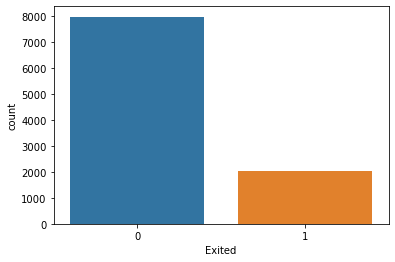

In [47]:
# Imbalanced dataset: 0 >> 1
sns.countplot(trainable_df.Exited);
trainable_df.Exited.value_counts(normalize=True) * 100

#### Credit Score

In [48]:
trainable_df.CreditScore.describe()

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

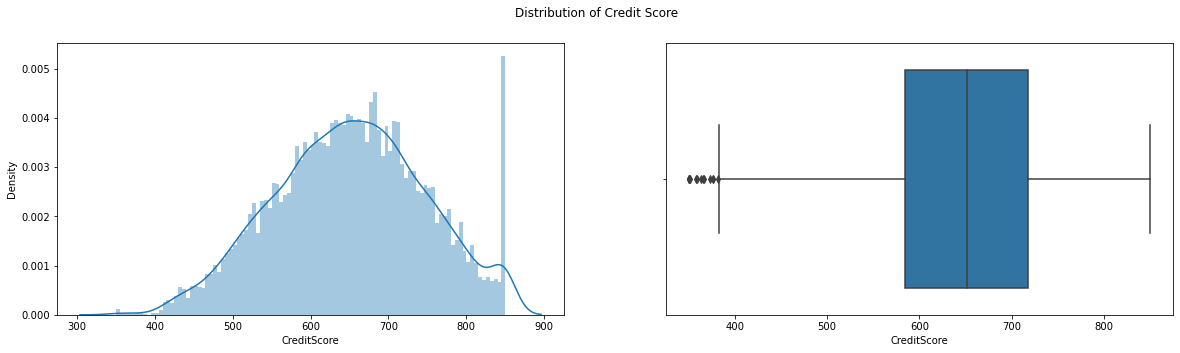

In [59]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
sns.distplot(trainable_df.CreditScore, bins=100, ax=ax[0])
sns.boxplot(data=trainable_df, x='CreditScore', ax=ax[1])
fig.suptitle('Distribution of Credit Score');

1    19
Name: Exited, dtype: int64


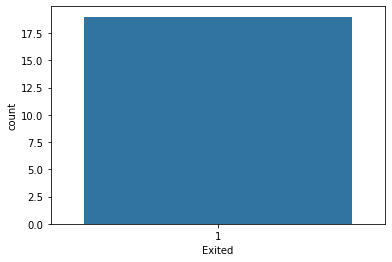

In [62]:
low = 400 
credit_low = trainable_df.query("CreditScore < 400")
sns.countplot(credit_low.Exited);
print(credit_low.Exited.value_counts())

0    518
1    127
Name: Exited, dtype: int64


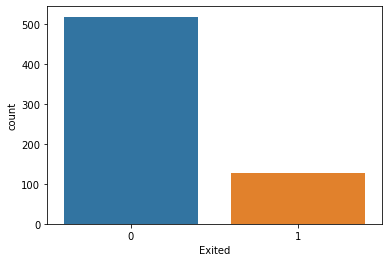

In [63]:
high = 800 
credit_high = trainable_df.query("CreditScore > 800")
sns.countplot(credit_high.Exited);
print(credit_high.Exited.value_counts())

#### Geography

In [64]:
trainable_df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [67]:
trainable_df.groupby('Geography').Exited.value_counts(normalize=True) * 100

Geography  Exited
France     0         83.845233
           1         16.154767
Germany    0         67.556796
           1         32.443204
Spain      0         83.326605
           1         16.673395
Name: Exited, dtype: float64

#### Balance and Estimated Salary

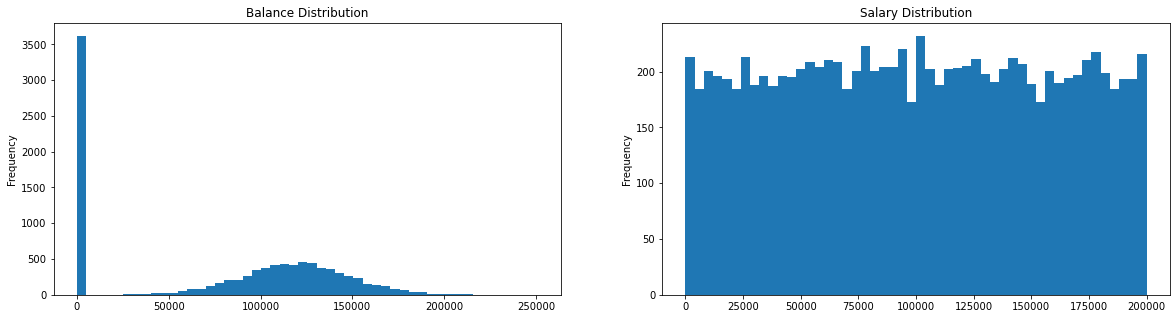

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
trainable_df.Balance.plot(kind='hist', ax=ax[0], bins=50, title='Balance Distribution')
trainable_df.EstimatedSalary.plot(kind='hist', ax=ax[1], bins=50, title='Salary Distribution');

In [75]:
#trainable_df.groupby('Exited').agg(mean_balance=('Balance', 'mean'), median_balance=('Balance', 'median'))
trainable_df.groupby('Exited')[['Balance', 'EstimatedSalary']].describe()

Balance                                                        \
         count          mean           std  min       25%        50%   
Exited                                                                 
0       7963.0  72745.296779  62848.040701  0.0      0.00   92072.68   
1       2037.0  91108.539337  58360.794816  0.0  38340.02  109349.29   

                             EstimatedSalary                               \
              75%        max           count           mean           std   
Exited                                                                      
0       126410.28  221532.80          7963.0   99738.391772  57405.586966   
1       131433.33  250898.09          2037.0  101465.677531  57912.418071   

                                                           
          min       25%        50%         75%        max  
Exited                                                     
0       90.07  50783.49   99645.04  148609.955  199992.48  
1       11.58  51907.72  102460.84  152422.910  199808.10

#### Tenure and HasCrCard

In [77]:
trainable_df.groupby('Exited')['HasCrCard'].value_counts(normalize=True)

Exited  HasCrCard
0       1            0.707146
        0            0.292854
1       1            0.699067
        0            0.300933
Name: HasCrCard, dtype: float64

In [79]:
trainable_df.groupby('Exited')['Tenure'].value_counts(normalize=True, sort=True)

Exited  Tenure
0       7         0.106869
        2         0.106367
        8         0.103981
        1         0.100841
        5         0.100841
        3         0.099962
        4         0.098707
        6         0.096823
        9         0.096823
        10        0.048851
        0         0.039935
1       1         0.113893
        3         0.104566
        9         0.104566
        5         0.102602
        4         0.099656
        2         0.098675
        8         0.096711
        6         0.096220
        7         0.086892
        10        0.049583
        0         0.046637
Name: Tenure, dtype: float64

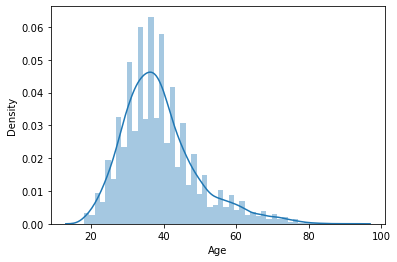

In [83]:
sns.distplot(trainable_df.Age);

#### Modeling

In [80]:
trainable_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9996,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9997,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9998,709,France,Female,36,7,0.00,1,0,1,42085.58,1


![](https://i.stack.imgur.com/3QemG.gif)

In [104]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [87]:
trainable_df.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0


In [95]:
geo_onehot = OneHotEncoder()
geograpy = geo_onehot.fit_transform(trainable_df[['Geography']]).toarray()

gender_onehot = OneHotEncoder()
gender = gender_onehot.fit_transform(trainable_df[['Gender']]).toarray()

In [103]:
onehot_df = pd.DataFrame(np.concatenate((geograpy, gender), axis=1), 
                         columns=np.concatenate((geo_onehot.categories_, gender_onehot.categories_), axis=1)[0])

In [109]:
onehot_df.head(2)

,France,Germany,Spain,Female,Male
0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,1.0,0.0


In [105]:
trainable_df.drop(columns=['Geography', 'Gender'], inplace=True)
trainable_df = trainable_df.reset_index().drop(columns='RowNumber')

In [113]:
df = pd.concat([trainable_df, onehot_df], axis=1)
df.head(2)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0,1.0,0.0
1,608,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0,1.0,0.0


In [136]:
scaler = MinMaxScaler()
X = scaler.fit_transform(df)
df = pd.DataFrame(X, columns=df.columns)

In [137]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,0.538,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0,1.0,0.0,0.0,1.0,0.0
1,0.516,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0,0.0,0.0,1.0,1.0,0.0
2,0.304,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0,1.0,0.0,0.0,1.0,0.0
3,0.698,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0,1.0,0.0,0.0,1.0,0.0
4,1.000,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0,1.0,0.0,0.0,0.0,1.0
9996,0.332,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0,1.0,0.0,0.0,0.0,1.0
9997,0.718,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0,1.0,0.0,0.0,1.0,0.0
9998,0.844,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0,0.0,1.0,0.0,0.0,1.0


In [138]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='Exited'), df[['Exited']], 
                                                    test_size=0.1, stratify=df[['Exited']], shuffle=True)

In [139]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization
from tensorflow.keras.metrics import AUC
from sklearn.calibration import calibration_curve
from sklearn.metrics import roc_auc_score

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 128)               1792      
_________________________________________________________________
dense_33 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_35 (Dense)             (None, 2)                 66        
Total params: 12,194
Trainable params: 12,194
Non-trainable params: 0
_________________________________________________________________


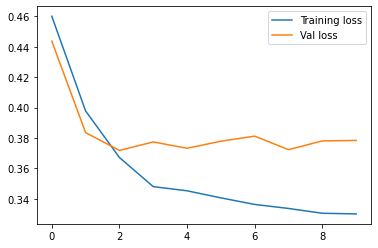

In [143]:
model = Sequential()
model.add(Input(shape=(X_train.shape[1], )))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
history = model.fit(X_train, y_train, epochs=10, verbose=0, validation_split=0.15)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()
plt.show()

In [149]:
pd.options.display.max_rows = 1100

In [160]:
roc_auc_score(y_test.Exited.values, predicted)

0.7840427628337767

In [159]:
thresh = 0.3
predicted = np.where(model.predict_proba(X_test)[:, 1] > thresh, 1, 0)
pd.DataFrame({'actual': y_test.Exited.values, 'predicted': predicted})

,actual,predicted
0,0.0,0
1,0.0,0
2,0.0,0
3,1.0,0
4,1.0,1
5,0.0,0
6,0.0,1
7,1.0,0
8,0.0,0
9,0.0,1
